In [1]:
from fastai.vision.all import *
from ipywidgets import widgets

In [24]:
# https://www.kaggle.com/datasets/somesh24/multiclass-images-for-weather-classification
# todo: download it instead of having locally
path = Path('../data_weather')
image_files = get_image_files(path)

In [25]:
def get_label_from_filename(file_path):
    return ''.join([char for char in file_path.split('_')[0] if not char.isdigit()])[:-4]

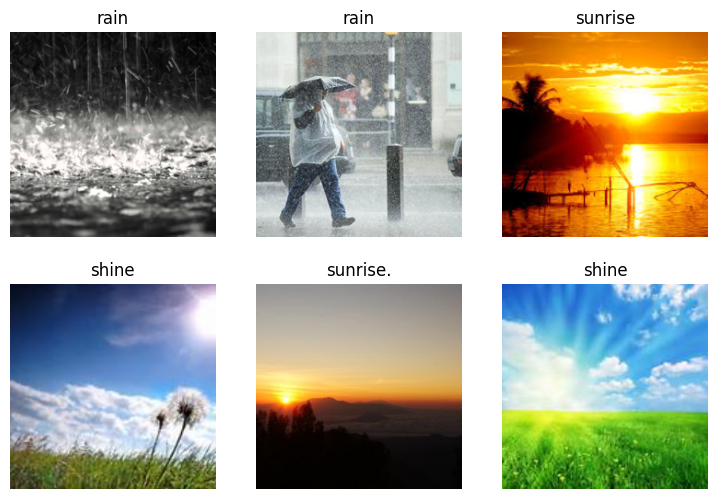

In [26]:
dls = ImageDataLoaders.from_name_func(
    path,
    get_image_files(path),         # Get all image files
    label_func=get_label_from_filename,  # Custom function for labels
    valid_pct=0.2,                 # Split 20% of data as validation set
    item_tfms=Resize(224)          # Resize all images to 224x224
)
dls.show_batch(max_n=6)

In [27]:
# Create a learner using a pre-trained resnet34 model
learn = vision_learner(dls, resnet34, metrics=accuracy)

epoch,train_loss,valid_loss,accuracy,time
0,1.761668,0.263764,0.920000,00:10


epoch,train_loss,valid_loss,accuracy,time
0,0.323942,0.138174,0.964444,00:13


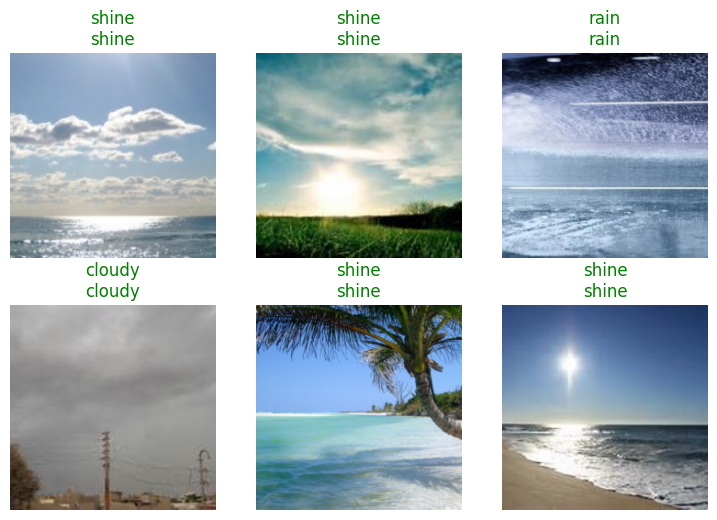

In [6]:
learn.fine_tune(1)

# Show results on a batch of the validation set
learn.show_results(max_n=6)

In [32]:
uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

Prediction: sunrise.
Confidence: 0.9999


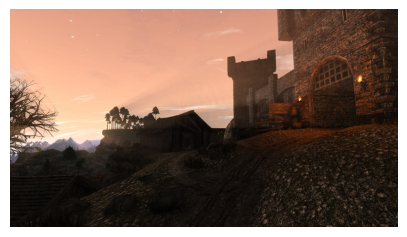

In [34]:
if uploader.data:
    img = PILImage.create(uploader.data[0])
    img.show()

    # Make a prediction using the trained model
    pred, pred_idx, probs = learn.predict(img)
    print(f"Prediction: {pred}")
    print(f"Confidence: {probs[pred_idx]:.4f}")
else:
    print("Upload an image. Faster, now")